In [2]:
# import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.simplefilter(action = 'ignore')


from collections import Counter
warnings.filterwarnings(action = 'ignore')

In [136]:
# import algorithms

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\andrewmvd\fetal-health-classification\versions\1


In [9]:
#read the dataset
data = pd.read_csv(r'C:\Users\USER\.cache\kagglehub\datasets\andrewmvd\fetal-health-classification\versions\1\fetal_health.csv')

data.sample(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
350,141.0,0.000,0.008,0.000,0.000,0.0,0.0,75.0,0.3,49.0,...,136.0,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
603,144.0,0.008,0.007,0.001,0.001,0.0,0.0,73.0,0.7,0.0,...,82.0,180.0,3.0,0.0,156.0,154.0,157.0,5.0,1.0,1.0
918,122.0,0.000,0.000,0.003,0.002,0.0,0.0,36.0,1.0,12.0,...,87.0,129.0,2.0,0.0,123.0,117.0,121.0,10.0,1.0,1.0


In [10]:
data.shape

(2126, 22)

In [11]:
print(f'our dataset columns are: \n {data.columns}')

our dataset columns are: 
 Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [16]:
data.fetal_health.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

# Exploraatory Data analysis


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [22]:
data.isna().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [35]:
target = data.fetal_health.value_counts()
target

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health'>

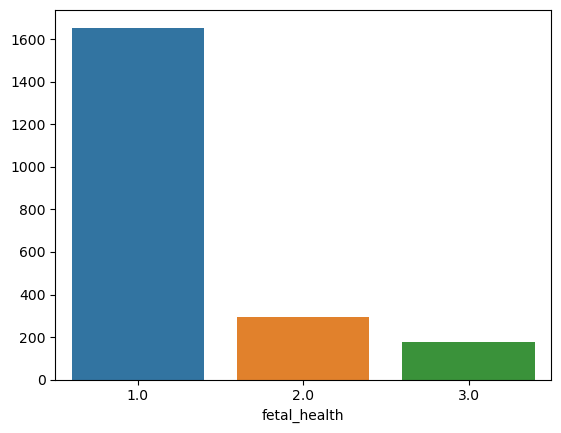

In [36]:
sns.barplot(x=target.index, y=target.values)

There is class imbalance 

<Axes: ylabel='count'>

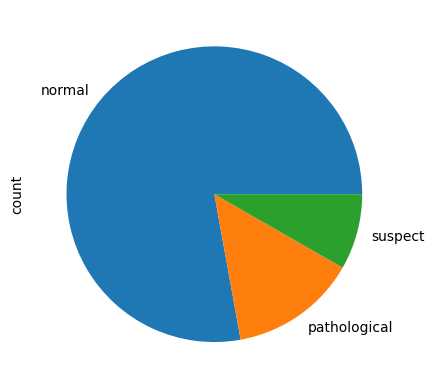

In [38]:
target.plot(kind = 'pie', labels = ['normal', 'pathological', 'suspect'])

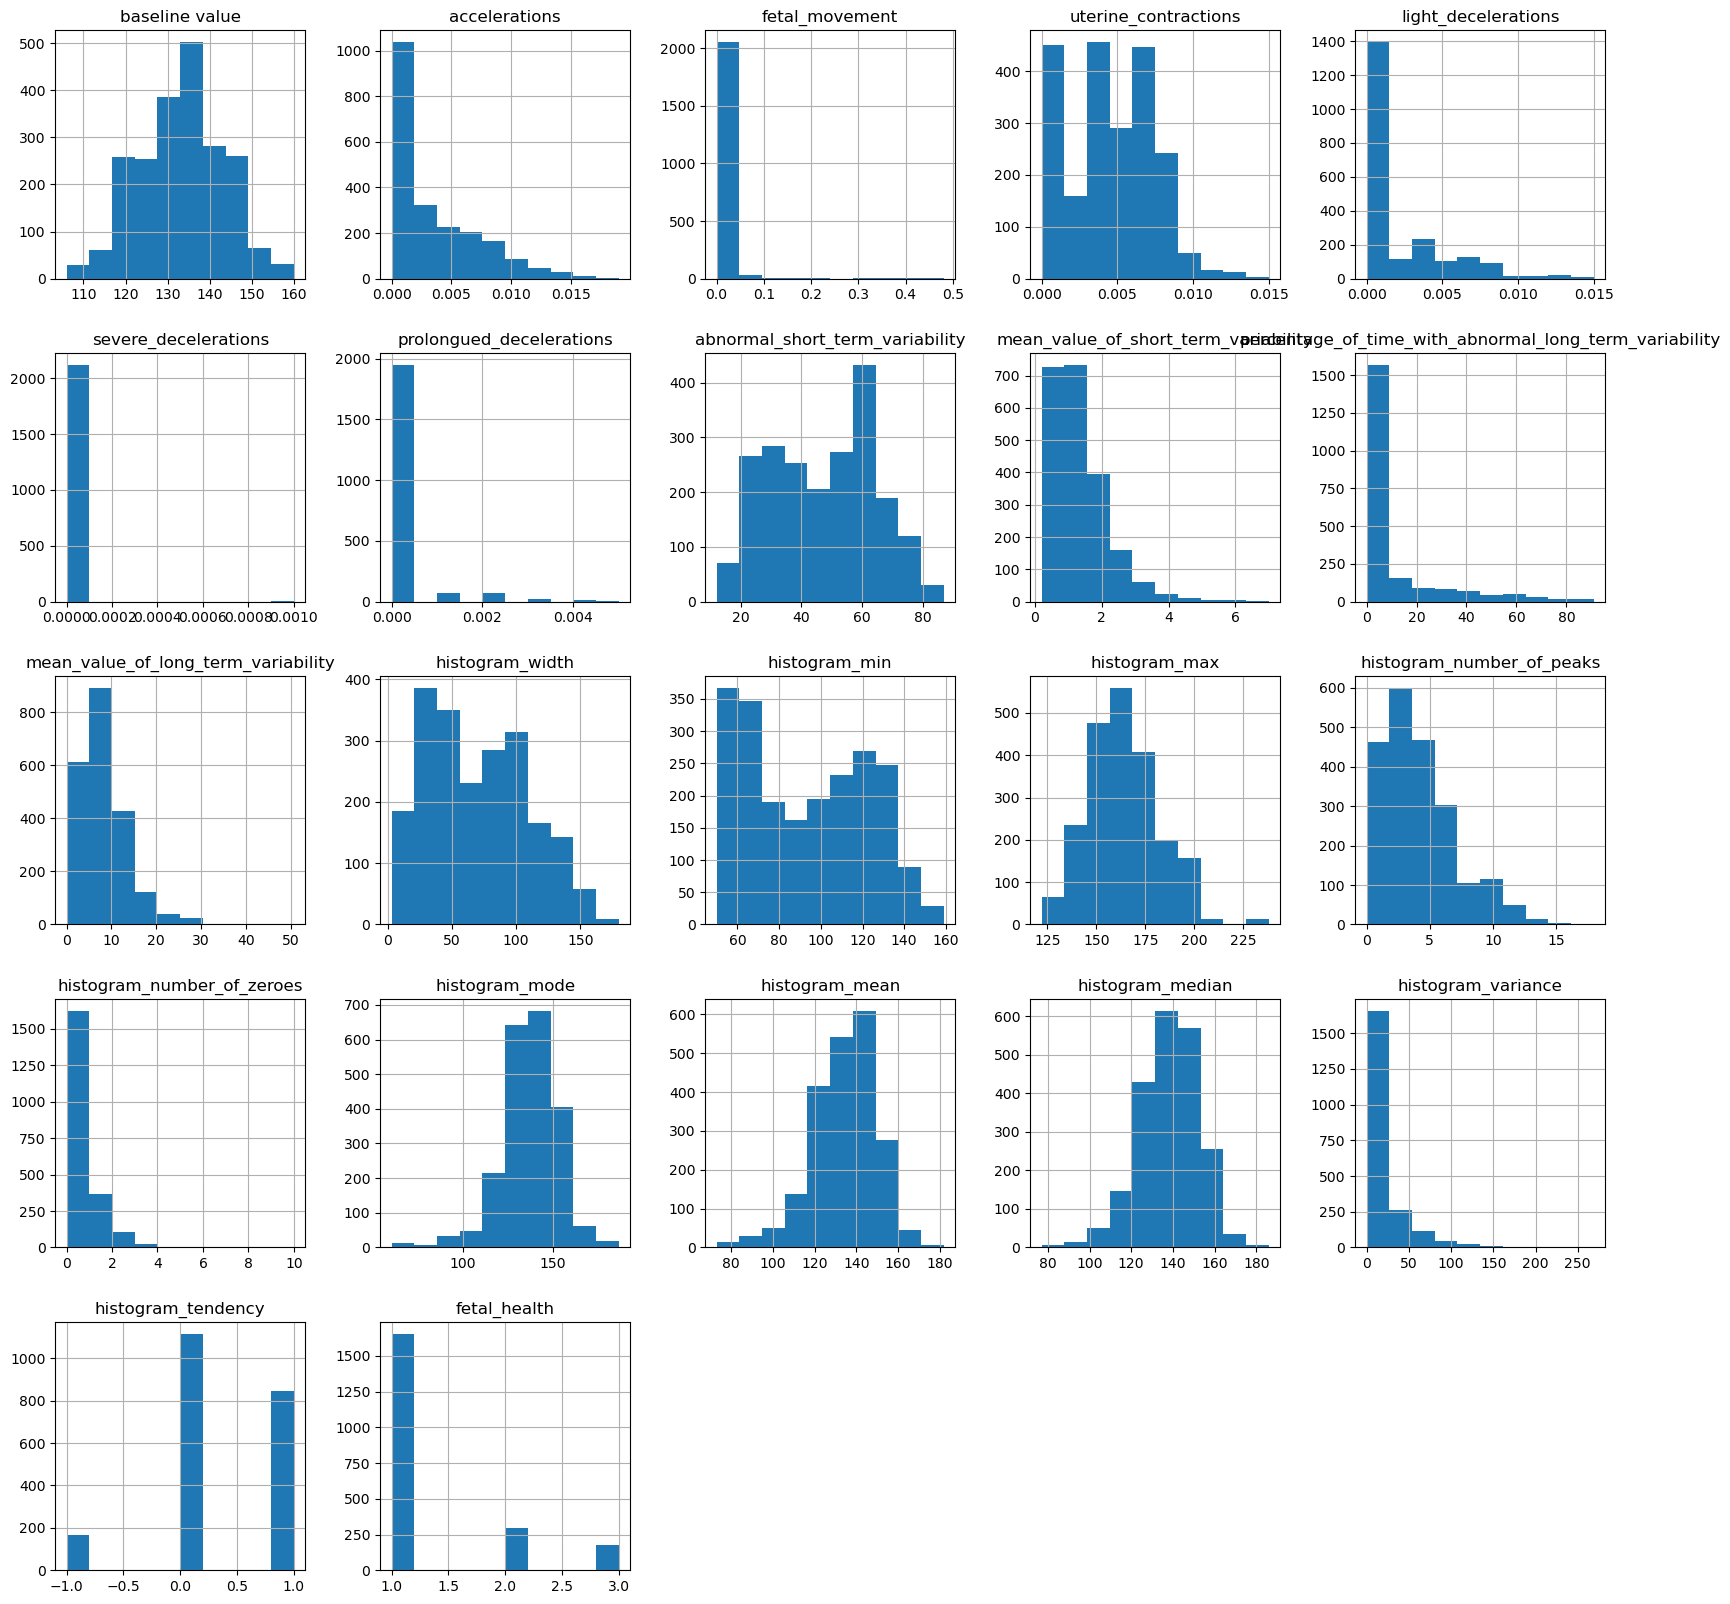

In [39]:
data_plots = data.hist(figsize = (20,20))

In [44]:
## correaltion analysis

num_cols = data.select_dtypes(exclude = 'object')
cat_cols = data.select_dtypes(include = 'object')

In [49]:
corr_matrix = num_cols.corr()

<Axes: >

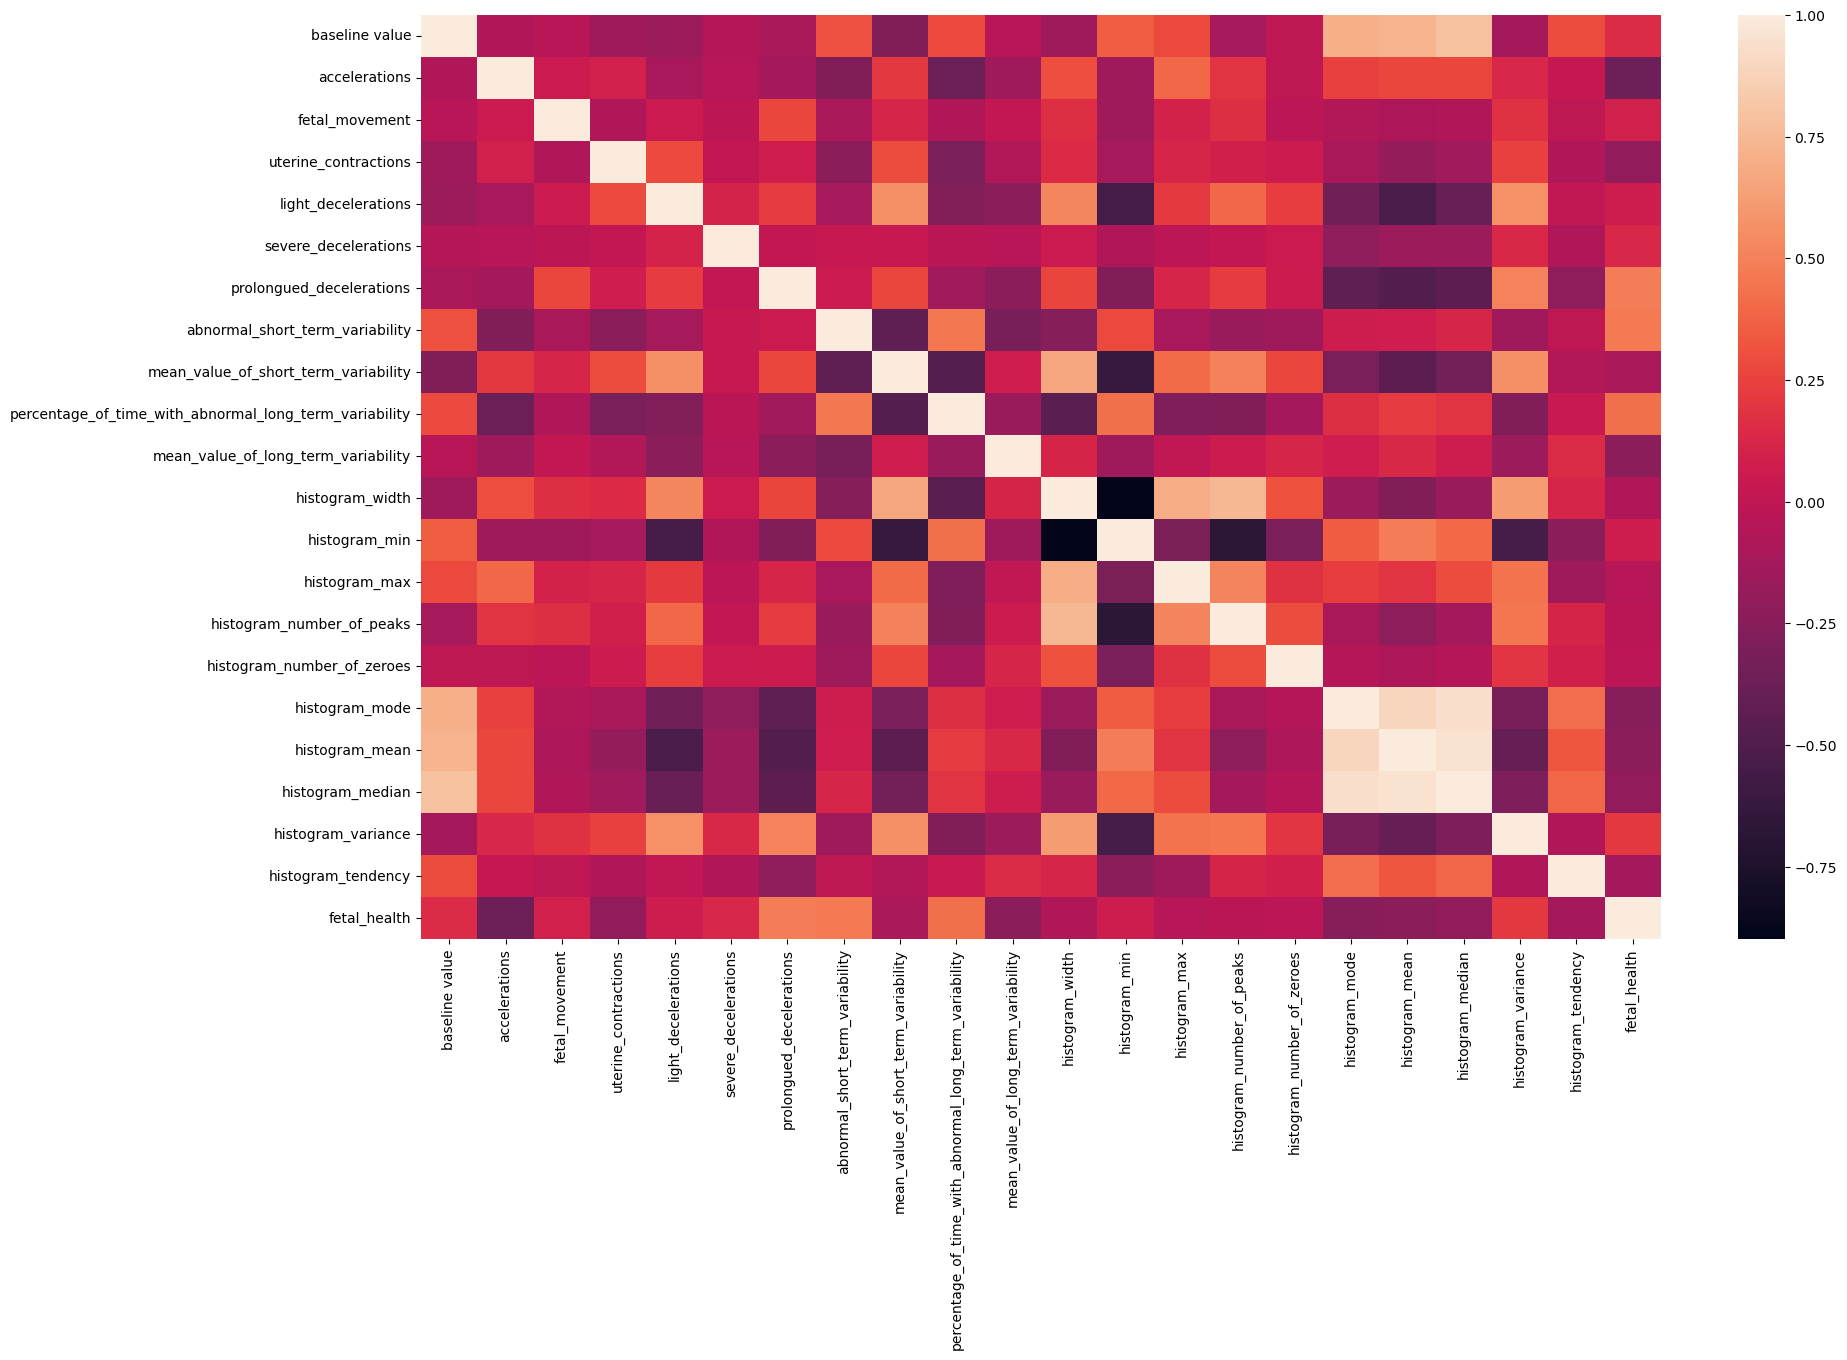

In [50]:
plt.figure(figsize = (20,12))
sns.heatmap(corr_matrix)

Text(0.5, 1.0, 'correlation matrix with only Fetal health')

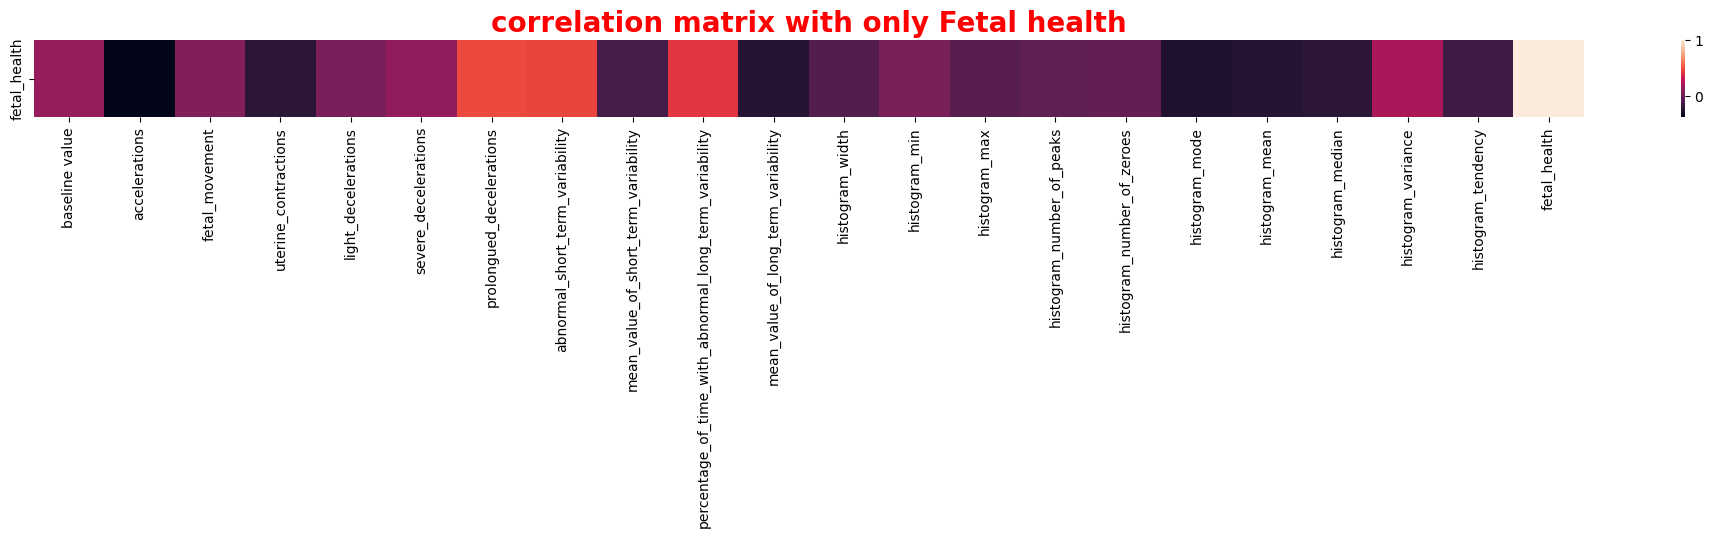

In [59]:
f, ax = plt.subplots(figsize = (25,1))
sns.heatmap(corr_matrix.sort_values(by = ['fetal_health'], ascending = False).head(1))
plt.title ('correlation matrix with only Fetal health', weight = 'bold', fontsize = '20', color = 'red')

In [61]:
corr_matrix.sort_values(by = ['fetal_health'], ascending = False).head(20).to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [66]:
corr_matrix['fetal_health'].sort_values( ascending=False).head(22)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

from the above analysis, we see that the top three features are 
positively correlated with the target variable, but not too much.

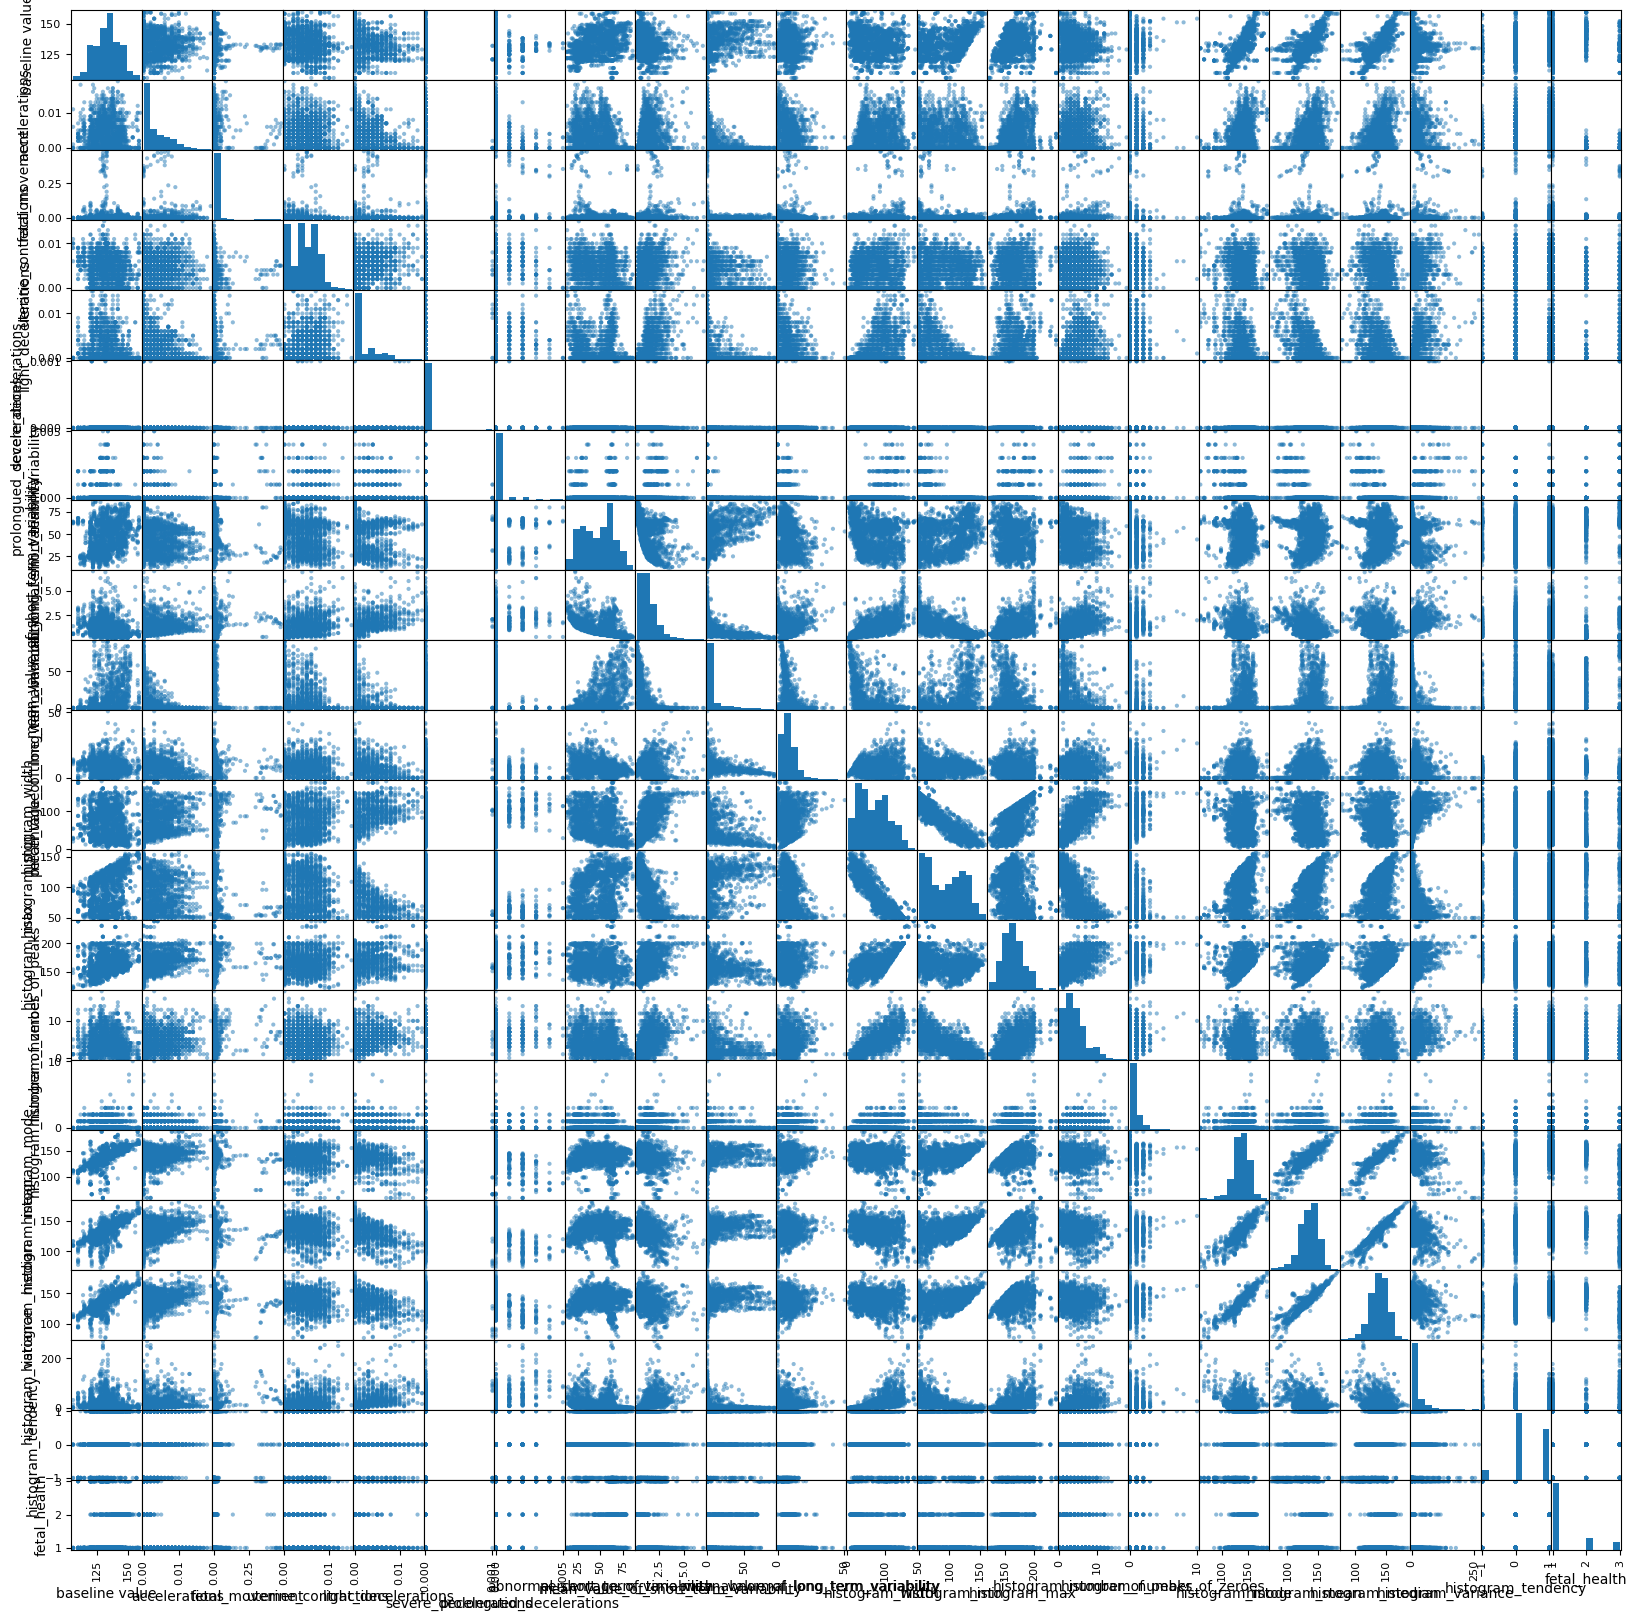

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20, 20))
plt.savefig('scaters.jpeg')

# Feature engeneering

Scaling

In [80]:
X.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
220,-0.437449,-0.046128,0.139734,-1.482465,-0.638438,-0.057476,-0.268754,0.291462,-0.716603,-0.535361,...,0.245313,-0.865539,-0.893279,2.011671,-0.458444,-0.271839,-0.039162,-0.282808,-0.545656,1.112980
404,1.697016,-0.822388,-0.203210,-1.482465,0.375243,-0.057476,-0.268754,1.513190,-0.490111,2.020021,...,1.991297,-1.440771,1.949536,1.333404,-0.458444,1.010413,0.987141,1.169154,0.351799,1.112980
1445,1.392092,-0.822388,-0.203210,0.215111,-0.638438,-0.057476,-0.268754,0.058752,-0.829849,2.291870,...,-1.346613,1.875276,0.165809,-0.701397,-0.458444,1.376771,1.500293,1.445718,-0.649208,-0.524526


In [86]:
columns = data.drop(['fetal_health'], axis = 1).columns   # prepare names of the columns for our independant varibale

scaler = StandardScaler() # initiate the scaling model

scaled_data = scaler.fit_transform(data.drop(['fetal_health'], axis = 1)) # fit the scaler on the model

X = pd.DataFrame(scaled_data, columns = columns)  # get a df of scaled data


In [87]:
# observe our df
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [88]:
# define our target variable 

y = data['fetal_health']

In [97]:
## split the data into test/ train sets

X_train ,X_test, y_train , y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [98]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1488, 21), (1488,), (638, 21), (638,))

# Model Training

1. Logistic regression
2. K Nearest Neighbors
3. Random Forest
4. Gradient Boosting model

# Logistic regression

In [99]:
log_reg = LogisticRegression() # initiate logistic regression 
log_reg.fit(X_train, y_train) # fit the model on training set

LogisticRegression()

In [100]:
# make some predictions

y_pred_lr = log_reg.predict(X_test)


In [104]:
y_pred_lr

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 3., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 2., 1., 2., 1., 1., 3., 2., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       3., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [109]:
# check accuracy of the predictions made

accuracy_lr = round(accuracy_score(y_pred_lr, y_test)*100, 3)
accuracy_lr

88.088

In [111]:
accuracy_lr = accuracy_score(y_pred_lr, y_test)
print()
print(f'the accuracy of LR is : {round(accuracy_lr, 3)}')


the accuracy of LR is : 0.881


### Cross validation

In [118]:
cv_method = StratifiedKFold(n_splits = 3)    # initiate cross validation method

In [130]:
## do cross validation on LR

cv_score = cross_val_score(log_reg, 
                           X_train, 
                           y_train,
                           cv = cv_method,
                           n_jobs = 2,
                           scoring = 'accuracy'
                          )
print(f'The cross validation score for LR is : {cv_score}')
print(f'The cross validation means for LR is : {round(cv_score.mean()*100,3)}%')
print(f'The cross validation standard validation is : {round(cv_score.std(),3)}')

The cross validation score for LR is : [0.89112903 0.90725806 0.89314516]
The cross validation means for LR is : 89.718%
The cross validation standard validation is : 0.007


In [123]:
cv_score

array([0.89112903, 0.90725806, 0.89314516])

# Hyper parameter tuning

In [150]:
params_lr = {'tol' : [0.0001, 0.0002, 0.0003], 
             'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'intercept_scaling': [1,2,3,4]
            }

GridSearchCV_lr = GridSearchCV(estimator = log_reg,
                               param_grid = params_lr,
                               cv = cv_method,
                               verbose = 1, 
                               n_jobs = 2,
                               scoring = 'accuracy',
                               return_train_score = True)

In [151]:
# Fit the model
GridSearchCV_lr.fit(X_train, y_train)

# Extract the best estimator
best_estimator_lr = GridSearchCV_lr.best_estimator_

# Print the best estimator
print(f'the best parameters are : {best_estimator_lr}')


Fitting 5 folds for each of 84 candidates, totalling 420 fits
the best parameters are : LogisticRegression(C=1)


In [154]:
GridSearchCV_lr.best_score_

0.8971708132781959

In [155]:
accuracy_lr

0.8808777429467085

there is a slight improvement about the accuracy after Hyperparameter tuning.

In [160]:
print('Classification report')
print()
print(f'{classification_report(y_test, y_pred_lr)}')

Classification report

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.68      0.62      0.65       101
         3.0       0.65      0.83      0.73        41

    accuracy                           0.88       638
   macro avg       0.76      0.80      0.77       638
weighted avg       0.88      0.88      0.88       638



In [159]:
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict = True))

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.943205,0.677419,0.653846,0.880878,0.758157,0.882534
recall,0.937500,0.623762,0.829268,0.880878,0.796844,0.880878
f1-score,0.940344,0.649485,0.731183,0.880878,0.773670,0.880857
support,496.000000,101.000000,41.000000,0.880878,638.000000,638.000000


In [163]:
# generate the confusion matrix

pd.DataFrame(confusion_matrix(y_test, y_pred_lr))

,0,1,2
0,465,26,5
1,25,63,13
2,3,4,34


<Axes: >

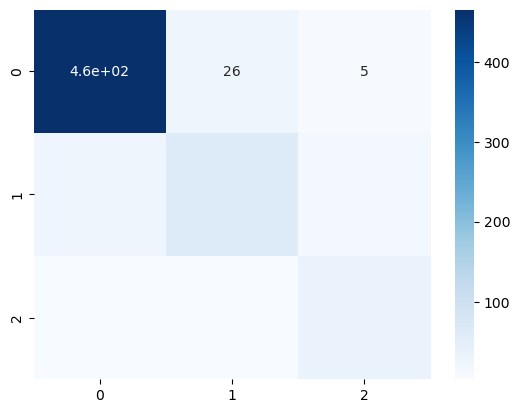

In [166]:
cf = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf, annot = True, cmap = 'Blues')

# KNN

In [172]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
accuracy_knn = knn_model.score(X_test, y_test)
accuracy_knn

0.9090909090909091

Let's tune the baseline Model

In [175]:
cv_method = StratifiedKFold(n_splits = 3)
score_knn = cross_val_score(knn, X_train, y_train, 
                           cv = cv_method,
                           n_jobs = 2,
                           scoring = 'accuracy')
score_knn

array([0.89919355, 0.89717742, 0.89516129])

In [177]:
knn_scores_mean = round(score_knn.mean(),3)*100
knn_scores_mean

89.7

In [179]:
knn_scores_std = round(score_knn.std(), 3)
knn_scores_std

0.002

In [182]:
params_knn = {'leaf_size' : list(range(1,30)),
              'n_neighbors' : list(range(1,30)), 
              'p' : [1,2]
}

In [185]:
GridSearchCV_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid = params_knn, 
                               cv = cv_method,
                                n_jobs = 2,
                           scoring = 'accuracy',
                                return_train_score = True
                               )

In [187]:
y_pred_knn = GridSearchCV_knn.fit(X_train, y_train)

In [188]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
best_estimator_knn

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [189]:
best_params_knn = GridSearchCV_knn.best_params_

In [190]:
print('###### Classification report ###')
print(f'Classification report : {classification_report(y_test, y_pred_knn)}')

###### Classification report ###


TypeError: Expected sequence or array-like, got <class 'sklearn.model_selection._search.GridSearchCV'>

In [193]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_knn))

Confusion matrix


TypeError: Expected sequence or array-like, got <class 'sklearn.model_selection._search.GridSearchCV'>

In [ ]:
# 